## Задание

Распознайте рукописную цифру, написанную на листе от руки.
Последовательность шагов следующая:

*   На бумаге рисуем произвольную цифру (желательно нарисовать цифру размером не
более 5 * 5 мм и без наклона. В занятии нейронка обучалась на цифрах американских студентов. Эти цифры были написаны на тетрадных листах в клетку и имели схожий размер).
*   Фотографируем. Загружаем фото в Collaboratory.
*   С помощью функции image.load_img(path, target_size=(28, 28), color_mode = ‘grayscale’) загружаем картинку в переменную.
*   С помощью функции image.img_to_array(img) преобразуем изображение в numpy-массив.
*   Выполняем инверсию цветов, нормирование и решейп массива.
*   Выполняем распознавание собственной рукописной цифры.

Примечание: точность распознавания рукописных цифр может быть достаточно низкой, т.к. рукописные цифры после преобразований хоть и похожи на содержащиеся в базе, но могут отличаться по конфигурации, толщине линий и т.д.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import gdown
gdown.download('https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz', None, quiet=True)

'mnist.npz'

In [3]:
!unzip -q mnist.npz

In [15]:
import matplotlib.pyplot as plt
import numpy as np

from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from tensorflow.keras import utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

%matplotlib inline

In [17]:
CLASS_COUNT = 10

In [18]:
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

x_train = x_train_org.reshape(x_train_org.shape[0], -1)
x_test = x_test_org.reshape(x_test_org.shape[0], -1)

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

y_train = utils.to_categorical(y_train_org, 10)
y_test = utils.to_categorical(y_test_org, 10)

In [19]:
model = Sequential()

model.add(Dense(100, input_dim=784, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(CLASS_COUNT, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train,
          y_train,
          batch_size=128,
          epochs=15,
          validation_split=0.1,
          verbose=1)

Epoch 1/15
422/422 [==============================] - 3s 5ms/step - loss: 0.3691 - accuracy: 0.8949 - val_loss: 0.1564 - val_accuracy: 0.9575
Epoch 2/15
422/422 [==============================] - 2s 4ms/step - loss: 0.1567 - accuracy: 0.9536 - val_loss: 0.1139 - val_accuracy: 0.9685
Epoch 3/15
422/422 [==============================] - 2s 4ms/step - loss: 0.1102 - accuracy: 0.9673 - val_loss: 0.0953 - val_accuracy: 0.9747
Epoch 4/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0852 - accuracy: 0.9742 - val_loss: 0.0874 - val_accuracy: 0.9738
Epoch 5/15
422/422 [==============================] - 3s 6ms/step - loss: 0.0689 - accuracy: 0.9791 - val_loss: 0.0931 - val_accuracy: 0.9720
Epoch 6/15
422/422 [==============================] - 3s 7ms/step - loss: 0.0545 - accuracy: 0.9832 - val_loss: 0.0796 - val_accuracy: 0.9767
Epoch 7/15
422/422 [==============================] - 2s 4ms/step - loss: 0.0449 - accuracy: 0.9864 - val_loss: 0.0791 - val_accuracy: 0.9782
Epoch 

In [20]:
image = load_img('/content/drive/MyDrive/foto/изображение_2024-04-01_114143136.png',
                 target_size=(28, 28), color_mode = 'grayscale')

image = img_to_array(image)

inv_image = 255 - image
inv_image = inv_image.astype('float32') / 255.
res_inv_image = inv_image.reshape(inv_image.shape[-1], -1)

print(inv_image.shape, "->", res_inv_image.shape)

(28, 28, 1) -> (1, 784)


In [21]:
prediction = model.predict(res_inv_image)
pred = np.argmax(prediction)
print(f'Распознана цифра: {pred}')

1/1 [==============================] - 0s 67ms/step
Распознана цифра: 7


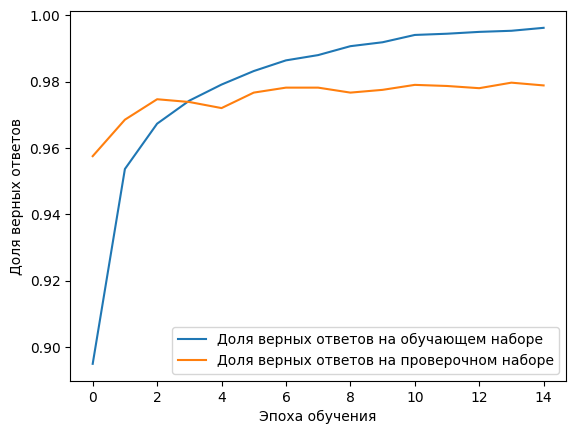

In [22]:
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')

plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')

plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')

plt.legend()

plt.show()

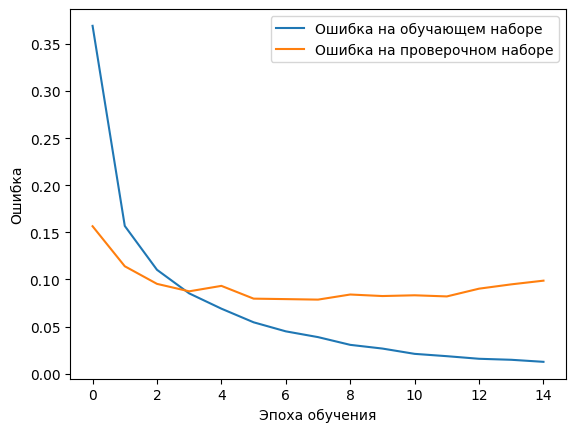

In [23]:
plt.plot(history.history['loss'],
         label='Ошибка на обучающем наборе')

plt.plot(history.history['val_loss'],
         label='Ошибка на проверочном наборе')

plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')

plt.legend()

plt.show()

In [24]:
scores = model.evaluate(x_test,
                        y_test,
                        verbose=0
                        )
print('Процент верных ответов на тестовых данных:', round(scores[1],2) * 100, '%')

Процент верных ответов на тестовых данных: 98.0 %
